# Isteresi "continuo"

In [307]:
import csv
import qutip
import numpy as np
import matplotlib.pyplot as plt


bloch= qutip.Bloch()
field = ["Ch", "Voltage", "Theta", "Eta", "DOP", "Power", "S1", "S2", "S3"]

data = np.empty((4, 4), dtype=object)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = []
with open("csv/hysteresis_2025-04-03_09-24.csv", mode="r", newline="") as file:
    rdr = csv.DictReader(file)
    rdr.fieldnames = field
    for i in range(1,5):
        file.seek(0)
        for row in rdr:
            if(row["Ch"]==str(i)):
                data[i-1,0].append(float(row["S1"]))
                data[i-1,1].append(float(row["S2"]))
                data[i-1,2].append(float(row["S3"]))
                data[i-1,3].append(float(row["Voltage"]))
dim1 = int(len(data[0,0])/4) # fine primo span
dim2 = dim1*2                # fine secondo span
dim3 = dim1*3                # fine terzo span
labels = ["Ch: 1", "Ch: 2", "Ch: 3", "Ch: 4"]

## -5000 -> 5000; 5000 -> -5000

Traccia blu : -5000 -> 5000

Traccia rossa : 5000 -> -5000

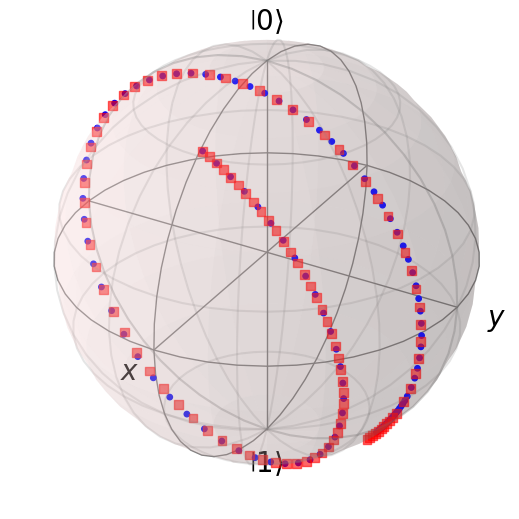

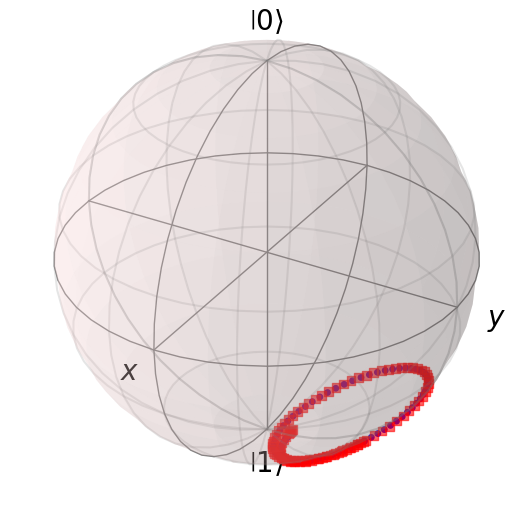

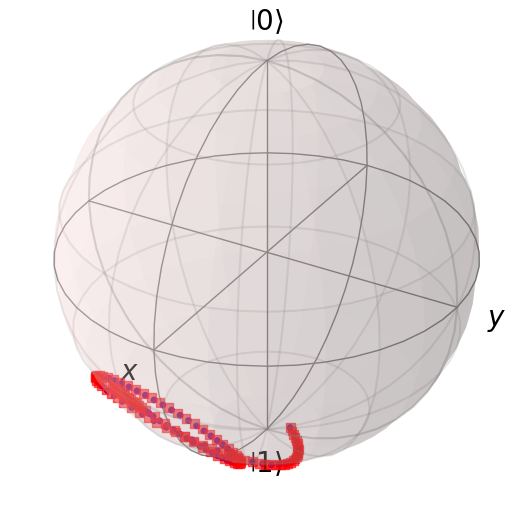

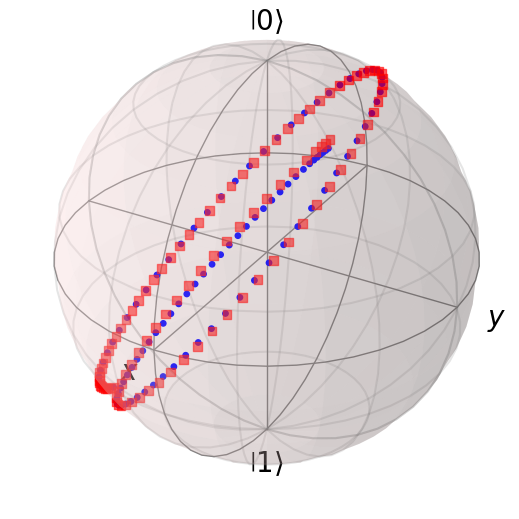

In [308]:
for i in range(4):
    bloch.clear()
    bloch.add_points([data[i,0][:dim1], data[i,1][:dim1], data[i,2][:dim1]], colors='b', alpha=1)
    #print(data[i,3][:dim1])
    bloch.add_points([data[i,0][dim1:dim2], data[i,1][dim1:dim2], data[i,2][dim1:dim2]], colors='r', alpha=0.6)
    #print(data[i,3][dim1:dim2])
    bloch.point_size=[15,40]
    bloch.show()

### Delta tra punti con stesso voltaggio

Ch  1  Min:  0.000976502094952845  Avg:  0.8247994188755624  Std:  0.45877873261556884
Ch  2  Min:  0.00010738545971263989  Avg:  0.33032456944485505  Std:  0.17612141192949077
Ch  3  Min:  0.0005381279364174475  Avg:  0.4235508057959733  Std:  0.24317033559428566
Ch  4  Min:  0.0008556736246526092  Avg:  0.7987227920760162  Std:  0.39178463707222383
Y-axis limits: (np.float64(0.0), np.float64(1.4359045643348318))
Converted to degrees: [ 0.         91.77134965]


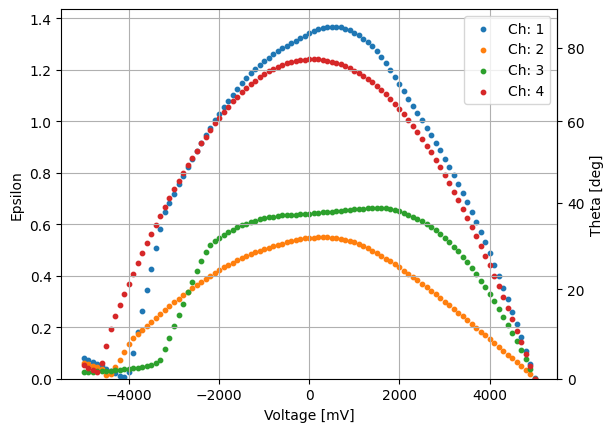

In [309]:
delta = np.empty(4, dtype=object)
for i in range( delta.shape[0]):
    delta[i]=[]
chart = plt.figure()
ax = chart.add_subplot(111)
def toAngle(x):
    return np.arccos((2-x**2)/2) * 180/np.pi
def invertAngle(t):
    return np.sqrt(2*(1-np.cos(t*np.pi/180)))
for i in range(4):
    for j in range(0,dim1):
        point_index=dim2-1-j
        #print(data[i,3][j])
        #print(data[i,3][point_index])
        delta[i].append(np.sqrt((data[i,0][j]-data[i,0][point_index])**2+(data[i,1][j]-data[i,1][point_index])**2+(data[i,2][j]-data[i,2][point_index])**2))
    #chart = plt.figure()
    #ax = chart.add_subplot(111)
    # Display data on 2D plot
    ax.scatter(data[i,3][:dim1], delta[i], marker='o', s=10, label=labels[i])
    ax.set_xlabel('Voltage [mV]')
    ax.set_ylabel('Epsilon')

    print("Ch ", i+1, " Min: ", np.min(delta[i]), " Avg: ", np.mean(delta[i])," Std: ", np.std(delta[i]))

ax.set_ylim(0)
secax = ax.secondary_yaxis('right', functions=(toAngle, invertAngle))
secax.set_ylabel('Theta [deg]')
print("Y-axis limits:", ax.get_ylim())
print("Converted to degrees:", toAngle(np.array(ax.get_ylim())))
plt.grid()
ax.legend()
plt.show()
chart.savefig("img/test2_hysteresis_1.pdf")


## 5000 -> -5000; -5000 -> 5000

Traccia blu : 5000 -> -5000

Traccia rossa : -5000 -> 5000

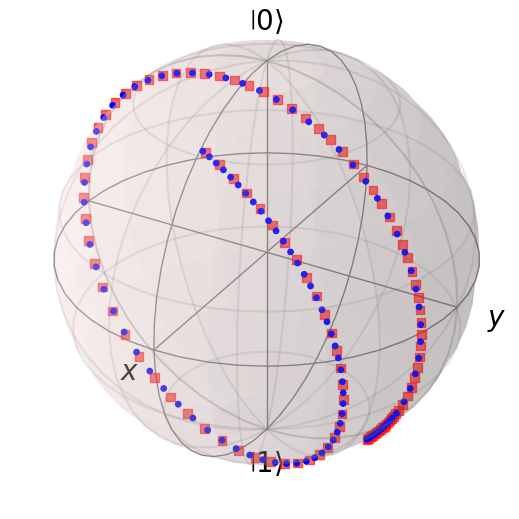

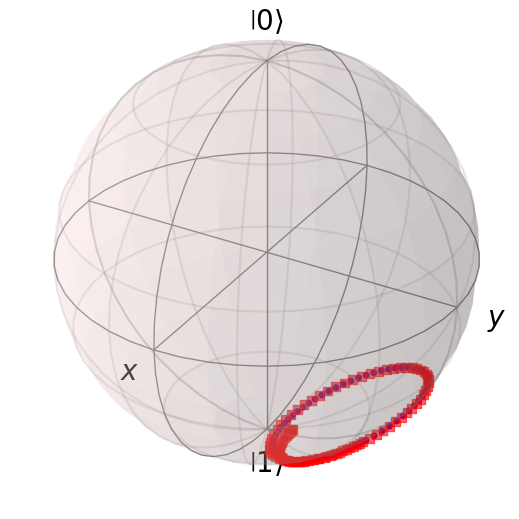

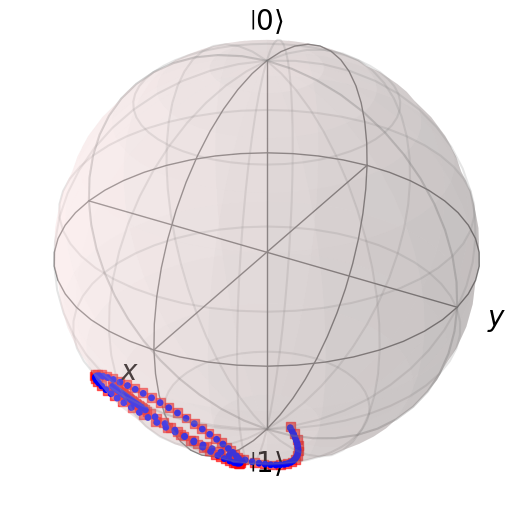

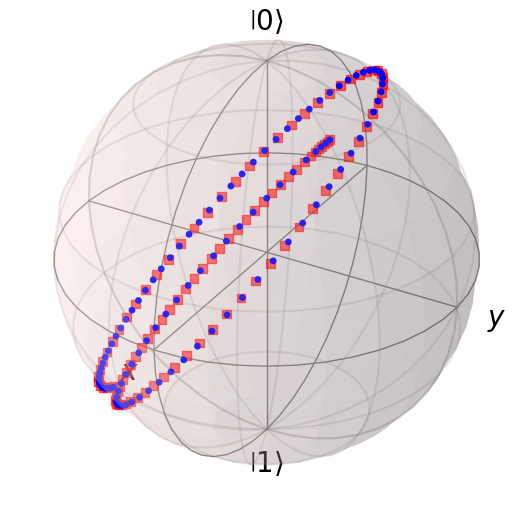

In [310]:

for i in range(4):
    bloch.clear()
    bloch.add_points([data[i,0][dim1:dim2], data[i,1][dim1:dim2], data[i,2][dim1:dim2]], colors='b', alpha=1)
    #print(data[i,3][dim1:dim2])
    bloch.add_points([data[i,0][dim2:dim3], data[i,1][dim2:dim3], data[i,2][dim2:dim3]], colors='r', alpha=0.6)
    #print(data[i,3][dim2:dim3])
    bloch.point_size=[15,40]
    bloch.show()

### Delta tra punti con stesso voltaggio

Ch  1  Delta[0]:  0.01707322482096996  Avg:  0.8282029187831198  Std:  0.45127184799142
Ch  2  Delta[0]:  0.02586564447745541  Avg:  0.34223950110009643  Std:  0.17432067622734368
Ch  3  Delta[0]:  0.014039098836591208  Avg:  0.4175299633443052  Std:  0.244354788085632
Ch  4  Delta[0]:  0.004041940160695922  Avg:  0.8034260738401259  Std:  0.388776826682172


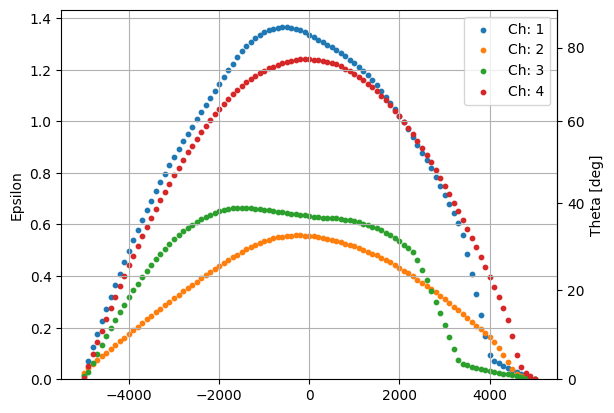

In [311]:
delta = np.empty(4, dtype=object)
for i in range( delta.shape[0]):
    delta[i]=[]
chart = plt.figure()
ax = chart.add_subplot(111)
def toAngle(x):
    return np.arccos((2-x**2)/2) * 180/np.pi
def invertAngle(t):
    return np.sqrt(2*(1-np.cos(t*np.pi/180)))
for i in range(4):
    for j in range(dim1,dim2):
        point_index=dim3-1-(j-dim1)
        #print(data[i,3][j])
        #print(data[i,3][point_index])
        delta[i].append(np.sqrt((data[i,0][j]-data[i,0][point_index])**2+(data[i,1][j]-data[i,1][point_index])**2+(data[i,2][j]-data[i,2][point_index])**2))
    #chart = plt.figure()
    #ax = chart.add_subplot(111)
    # Display data on 2D plot
    ax.scatter(data[i,3][:dim1], delta[i], marker='o', s=10, label=labels[i])
    ax.set_ylabel('Epsilon')
    
    print("Ch ", i+1, " Delta[0]: ", delta[i][0], " Avg: ", np.mean(delta[i])," Std: ", np.std(delta[i]))
ax.set_ylim(0)
secax = ax.secondary_yaxis('right', functions=(toAngle, invertAngle))
secax.set_ylabel('Theta [deg]')
plt.grid()
ax.legend()
plt.show()
chart.savefig("img/test2_hysteresis_2.pdf")

## -5000 -> 5000; -5000 -> 5000

Traccia blu : primo -5000 -> 5000

Traccia rossa : secondo -5000 -> 5000

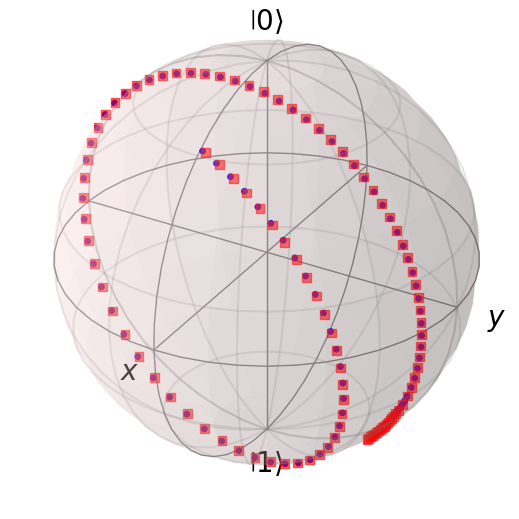

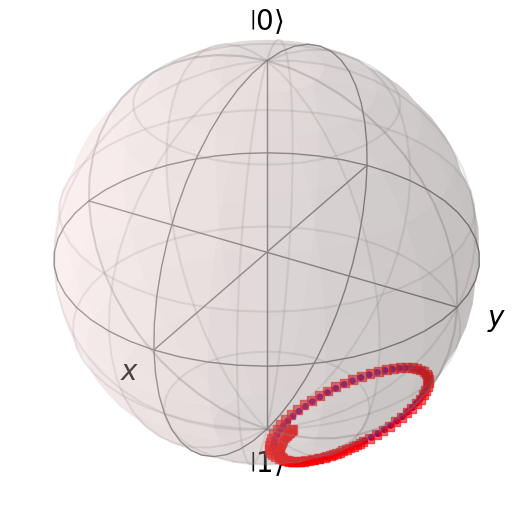

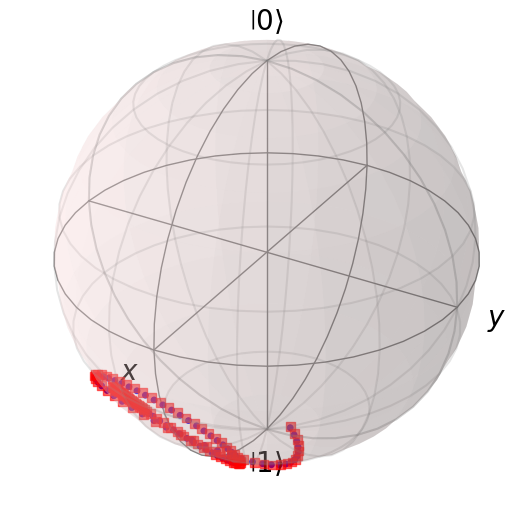

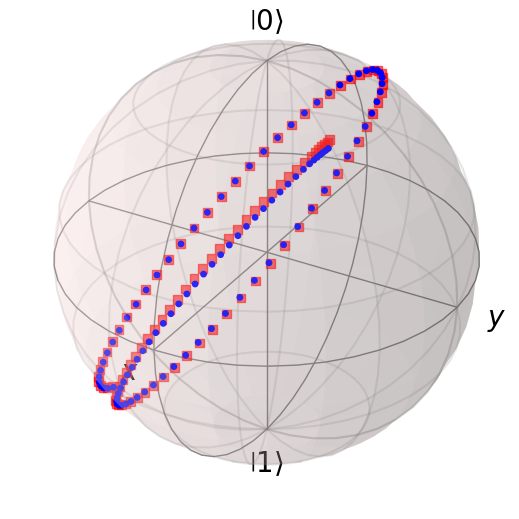

In [312]:

for i in range(4):
    bloch.clear()
    bloch.add_points([data[i,0][:dim1], data[i,1][:dim1], data[i,2][:dim1]], colors='b', alpha=1)
    #print(data[i,3][:dim1])
    bloch.add_points([data[i,0][dim2:dim3], data[i,1][dim2:dim3], data[i,2][dim2:dim3]], colors='r', alpha=0.6)
    #print(data[i,3][dim2:dim3])
    bloch.point_size=[15,40]
    bloch.show()

### Delta tra punti con stesso voltaggio

Ch  1  Delta[0]:  0.07916345368686746  Avg:  0.019334376821667703  Std:  0.023296975144636047
Ch  2  Delta[0]:  0.06168689737360361  Avg:  0.018867378135898227  Std:  0.013356374184415107
Ch  3  Delta[0]:  0.027285059449530115  Avg:  0.016572017888935687  Std:  0.00556687993464576
Ch  4  Delta[0]:  0.05234729759032771  Avg:  0.012963503287865408  Std:  0.015068669563997605


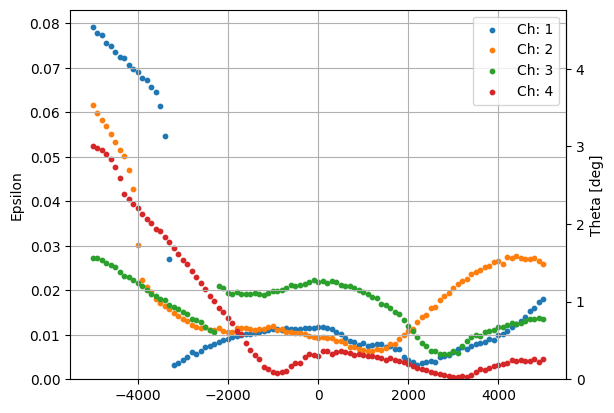

In [313]:
delta = np.empty(4, dtype=object)
for i in range( delta.shape[0]):
    delta[i]=[]
chart = plt.figure()
ax = chart.add_subplot(111)
def toAngle(x):
    return np.arccos((2-x**2)/2) * 180/np.pi
def invertAngle(t):
    return np.sqrt(2*(1-np.cos(t*np.pi/180)))
for i in range(4):
    for j in range(0,dim1):
        point_index=dim2+j
        #print(data[i,3][j])
        #print(data[i,3][point_index])
        delta[i].append(np.sqrt((data[i,0][j]-data[i,0][point_index])**2+(data[i,1][j]-data[i,1][point_index])**2+(data[i,2][j]-data[i,2][point_index])**2))
    #chart = plt.figure()
    #ax = chart.add_subplot(111)
    # Display data on 2D plot
    ax.scatter(data[i,3][:dim1], delta[i], marker='o', s=10, label=labels[i])
    ax.set_ylabel('Epsilon')
    
    print("Ch ", i+1, " Delta[0]: ", delta[i][0], " Avg: ", np.mean(delta[i])," Std: ", np.std(delta[i]))
ax.set_ylim(0)
secax = ax.secondary_yaxis('right', functions=(toAngle, invertAngle))
secax.set_ylabel('Theta [deg]')
plt.grid()
ax.legend()
plt.show()
chart.savefig("img/test2_hysteresis_3.pdf")

## 5000 -> -5000; 5000 -> -5000

Traccia blu : primo 5000 -> -5000

Traccia rossa : secondo 5000 -> -5000

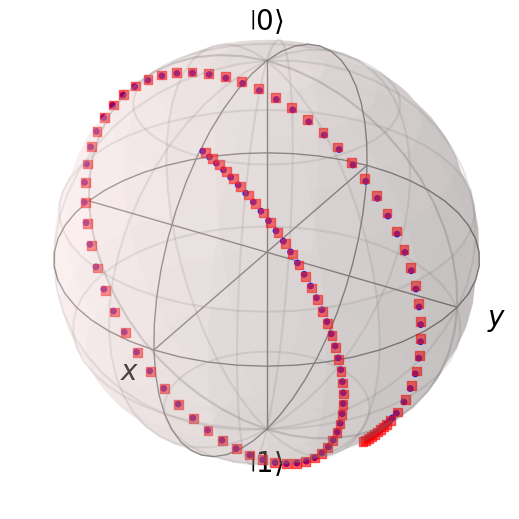

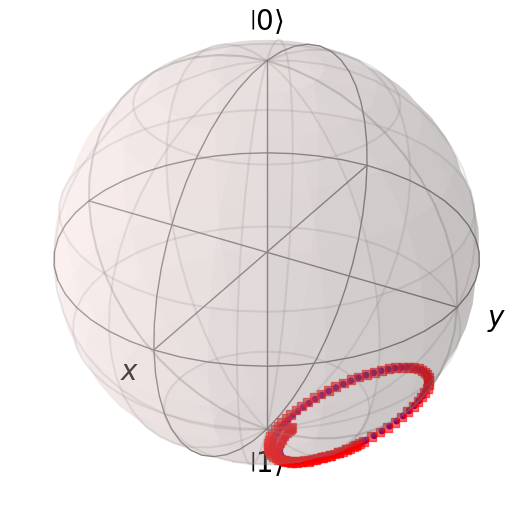

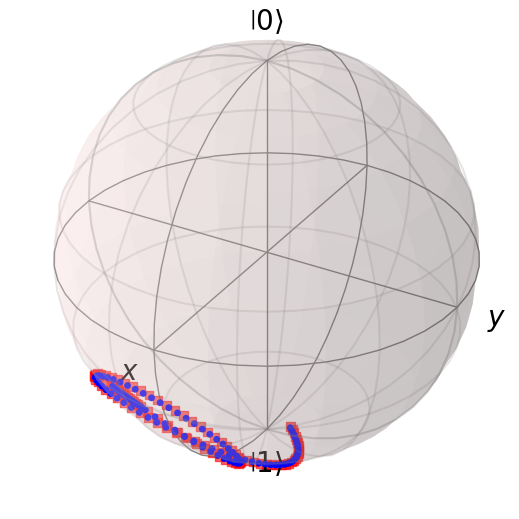

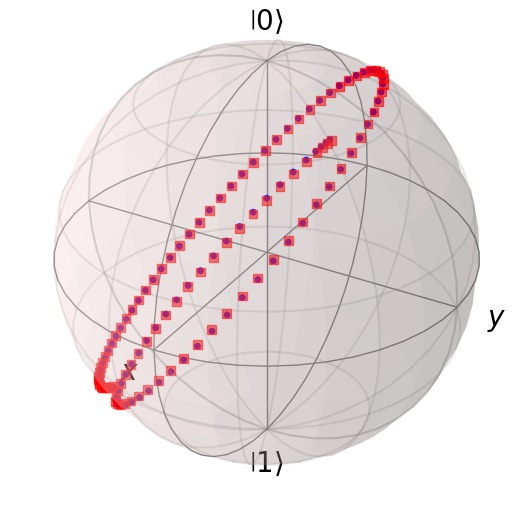

In [314]:

for i in range(4):
    bloch.clear()
    bloch.add_points([data[i,0][dim1:dim2], data[i,1][dim1:dim2], data[i,2][dim1:dim2]], colors='b', alpha=1)
    #print(data[i,3][dim1:dim2])
    bloch.add_points([data[i,0][dim3:], data[i,1][dim3:], data[i,2][dim3:]], colors='r', alpha=0.6)
    #print(data[i,3][dim3:])
    bloch.point_size=[15,40]
    bloch.show()

### Delta tra punti con stesso voltaggio

Ch  1  Delta[0]:  0.01804987108060083  Avg:  0.013200664827782115  Std:  0.007330751234305873
Ch  2  Delta[0]:  0.026183518097643525  Avg:  0.017003180496112425  Std:  0.006970366541249752
Ch  3  Delta[0]:  0.01364783169498289  Avg:  0.012155105125975637  Std:  0.005513760062344391
Ch  4  Delta[0]:  0.0041589238553251025  Avg:  0.005233283596037936  Std:  0.00233304091171461


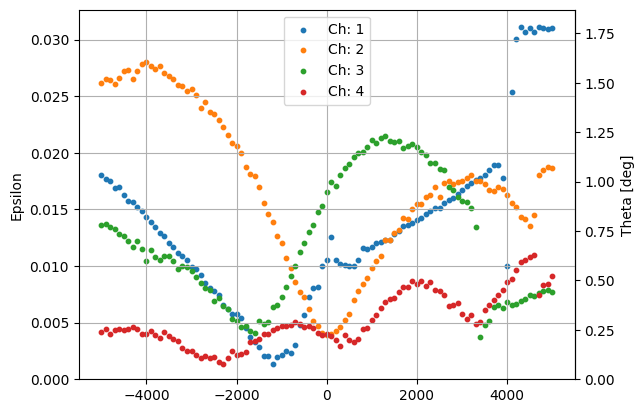

In [315]:
delta = np.empty(4, dtype=object)
for i in range( delta.shape[0]):
    delta[i]=[]
chart = plt.figure()
ax = chart.add_subplot(111)
def toAngle(x):
    return np.arccos((2-x**2)/2) * 180/np.pi
def invertAngle(t):
    return np.sqrt(2*(1-np.cos(t*np.pi/180)))
for i in range(4):
    for j in range(dim1,dim2):
        point_index=dim3+j-dim1
        #print(data[i,3][j])
        #print(data[i,3][point_index])
        delta[i].append(np.sqrt((data[i,0][j]-data[i,0][point_index])**2+(data[i,1][j]-data[i,1][point_index])**2+(data[i,2][j]-data[i,2][point_index])**2))
    #chart = plt.figure()
    #ax = chart.add_subplot(111)
    # Display data on 2D plot
    ax.scatter(data[i,3][:dim1], delta[i], marker='o', s=10, label=labels[i])
    ax.set_ylabel('Epsilon')

    print("Ch ", i+1, " Delta[0]: ", delta[i][0], " Avg: ", np.mean(delta[i])," Std: ", np.std(delta[i]))
ax.set_ylim(0)
secax = ax.secondary_yaxis('right', functions=(toAngle, invertAngle))
secax.set_ylabel('Theta [deg]')
plt.grid()
ax.legend()
plt.show()
chart.savefig("img/test2_hysteresis_4.pdf")

# Isteresi con salto

In [316]:
import csv
import qutip
import numpy as np
import matplotlib.pyplot as plt


bloch= qutip.Bloch()
field = ["Ch", "Voltage", "Theta", "Eta", "DOP", "Power", "S1", "S2", "S3"]

## -5000 -> 5000 -> -5000

In [317]:
data = np.empty((4, 4), dtype=object)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = []
with open("csv/hysteresis_2025-04-07_08-51.csv", mode="r", newline="") as file:
    rdr = csv.DictReader(file)
    rdr.fieldnames = field
    for i in range(1,5):
        file.seek(0)
        for row in rdr:
            if(row["Ch"]==str(i)):
                data[i-1,0].append(float(row["S1"]))
                data[i-1,1].append(float(row["S2"]))
                data[i-1,2].append(float(row["S3"]))
                data[i-1,3].append(float(row["Voltage"]))

### Delta tra punto iniziale e punto finale (stesso voltaggio)

In [318]:
delta = np.empty(4)
for i in range(4):
    delta[i]=np.sqrt((data[i,0][0]-data[i,0][2])**2+(data[i,1][0]-data[i,1][2])**2+(data[i,2][0]-data[i,2][2])**2)
    print("Ch ", i+1, " Delta: ", delta[i])

Ch  1  Delta:  0.004129621449701726
Ch  2  Delta:  0.010384227561836622
Ch  3  Delta:  0.006896484370806525
Ch  4  Delta:  0.0019099263750246725


## 5000 -> -5000 -> 5000

In [319]:
data = np.empty((4, 4), dtype=object)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = []
with open("csv/hysteresis_2025-04-07_08-51.csv", mode="r", newline="") as file:
    rdr = csv.DictReader(file)
    rdr.fieldnames = field
    for i in range(1,5):
        file.seek(0)
        for row in rdr:
            if(row["Ch"]==str(i)):
                data[i-1,0].append(float(row["S1"]))
                data[i-1,1].append(float(row["S2"]))
                data[i-1,2].append(float(row["S3"]))
                data[i-1,3].append(float(row["Voltage"]))

### Delta tra punto iniziale e punto finale (stesso voltaggio)

In [320]:
delta = np.empty(4)
for i in range(4):
    delta[i]=np.sqrt((data[i,0][1]-data[i,0][3])**2+(data[i,1][1]-data[i,1][3])**2+(data[i,2][1]-data[i,2][3])**2)
    print("Ch ", i+1, " Delta: ", delta[i])

Ch  1  Delta:  0.011919134195796306
Ch  2  Delta:  0.02168354071205553
Ch  3  Delta:  0.018201954785009637
Ch  4  Delta:  0.014998807649025824


## 0 -> -5000 -> 0

In [321]:
data = np.empty((4, 4), dtype=object)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = []
with open("csv/hysteresis_2025-03-31_11-40.csv", mode="r", newline="") as file:
    rdr = csv.DictReader(file)
    rdr.fieldnames = field
    for i in range(1,5):
        file.seek(0)
        for row in rdr:
            if(row["Ch"]==str(i)):
                data[i-1,0].append(float(row["S1"]))
                data[i-1,1].append(float(row["S2"]))
                data[i-1,2].append(float(row["S3"]))
                data[i-1,3].append(float(row["Voltage"]))

### Delta tra punto iniziale e punto finale (stesso voltaggio)

In [322]:
delta = np.empty(4)
for i in range(4):
    delta[i]=np.sqrt((data[i,0][0]-data[i,0][2])**2+(data[i,1][0]-data[i,1][2])**2+(data[i,2][0]-data[i,2][2])**2)
    print("Ch ", i+1, " Delta: ", delta[i])

Ch  1  Delta:  0.6474749876540502
Ch  2  Delta:  0.9286595688365343
Ch  3  Delta:  0.5226534257869606
Ch  4  Delta:  1.2830434132004798


## 0 -> 5000 -> 0

In [323]:
data = np.empty((4, 4), dtype=object)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = []
with open("csv/hysteresis_2025-03-31_11-29.csv", mode="r", newline="") as file:
    rdr = csv.DictReader(file)
    rdr.fieldnames = field
    for i in range(1,5):
        file.seek(0)
        for row in rdr:
            if(row["Ch"]==str(i)):
                data[i-1,0].append(float(row["S1"]))
                data[i-1,1].append(float(row["S2"]))
                data[i-1,2].append(float(row["S3"]))
                data[i-1,3].append(float(row["Voltage"]))

### Delta tra punto iniziale e punto finale (stesso voltaggio)

In [324]:
delta = np.empty(4)
for i in range(4):
    delta[i]=np.sqrt((data[i,0][0]-data[i,0][2])**2+(data[i,1][0]-data[i,1][2])**2+(data[i,2][0]-data[i,2][2])**2)
    print("Ch ", i+1, " Delta: ", delta[i])

Ch  1  Delta:  1.2313808779038726
Ch  2  Delta:  1.372846646552479
Ch  3  Delta:  1.4338140317854835
Ch  4  Delta:  1.2697189041775818
